In [61]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [62]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/root/userspace/Workspace/competition1/input/"

df = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [63]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(df.shape[0], df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(df_test.shape[0], df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [64]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

これらの変数名を、README.ipynbに示された変数の説明と対応付けておきましょう。  

変数 |定義 |備考  
---|---|---
Survived |生存したかどうか |0 = No, 1 = Yes
Pclass |チケットのクラス |1 = 1st, 2 = 2nd, 3 = 3rd
Name |名前 |
Sex |性別 |
Age	|年齢 |
SibSp |乗船していた兄弟姉妹・配偶者の数	|
Parch |乗船していた親・子供の数	|
Ticket |チケット番号	|
Fare |チケット料金	|
Cabin |キャビン番号	|
embarked |乗船した港	|C = Cherbourg, Q = Queenstown, S = Southampton



In [66]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
pClass1 = df.copy()
pClass1 = pClass1[pClass1['Pclass']==1]
pClass2 = df.copy()
pClass2 = pClass2[pClass2['Pclass']==2]
pClass3 = df.copy()
pClass3 = pClass3[pClass3['Pclass']==3]
pClass1test = df_test.copy()
pClass1test = pClass1test[pClass1test['Pclass']==1]
pClass2test = df_test.copy()
pClass2test = pClass2test[pClass2test['Pclass']==2]
pClass3test = df_test.copy()
pClass3test = pClass3test[pClass3test['Pclass']==3]

In [68]:
print(pClass1['Age'].mean())
print(pClass2['Age'].mean())
print(pClass3['Age'].mean())
print(pClass1test['Age'].mean())
print(pClass2test['Age'].mean())
print(pClass3test['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986
40.91836734693877
28.7775
24.02794520547945


In [69]:
pClass1['Age'].fillna(pClass1['Age'].mean(), inplace=True)
pClass2['Age'].fillna(pClass2['Age'].mean(), inplace=True)
pClass3['Age'].fillna(pClass3['Age'].mean(), inplace=True)

pClass1test['Age'].fillna(pClass1['Age'].mean(), inplace=True)
pClass2test['Age'].fillna(pClass2['Age'].mean(), inplace=True)
pClass3test['Age'].fillna(pClass3['Age'].mean(), inplace=True)

In [70]:
p_df = pClass1
p_df = p_df.append(pClass2)
p_df = p_df.append(pClass3)

p_df_test = pClass1test
p_df_test = p_df_test.append(pClass2test)
p_df_test = p_df_test.append(pClass3test)

In [71]:
print('訓練データのデータ数は{}、変数は{}種類です。'.format(p_df.shape[0], p_df.shape[1]))
print('テストデータのデータ数は{}、変数は{}種類です'.format(p_df_test.shape[0], p_df_test.shape[1]))

訓練データのデータ数は891、変数は12種類です。
テストデータのデータ数は418、変数は11種類です


In [72]:
p_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

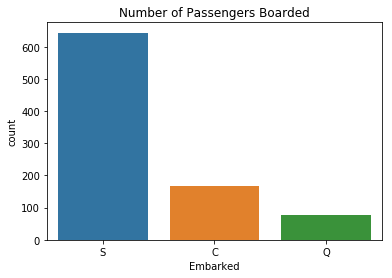

In [73]:
sns.countplot('Embarked',data=df)
plt.title('Number of Passengers Boarded')
plt.show()

In [74]:
p_df['Embarked'].fillna('S', inplace=True)
p_df_test['Embarked'].fillna('S', inplace=True)

p_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [75]:
p_df.drop('Cabin', axis=1, inplace=True)
p_df_test.drop('Cabin', axis=1, inplace=True)

p_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [76]:
p_df.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
p_df_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)

p_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.0,0,0,113783,26.5500,S
23,24,1,1,"Sloper, Mr. William Thompson",0,28.0,0,0,113788,35.5000,S


In [77]:
age = pd.concat([df['Age'], df_test['Age']])
fare = pd.concat([df['Fare'], df_test['Fare']])

df['Age'].fillna(age.mean(), inplace=True)
df_test['Age'].fillna(age.mean(), inplace=True)

df['Fare'].fillna(fare.mean(), inplace=True)
df_test['Fare'].fillna(fare.mean(), inplace=True)

df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
#名前を　mis mr 01でわける
#Mr(1),Mrs(2),Miss(3),Ms(4)
p_df['keisyo'] = 0
p_df_test['keisyo'] = 0
data = p_df.copy()
data_test = p_df_test.copy()
i=0
for x, row in data.iterrows():
    Name = row["Name"]
    if 'Mrs' in Name:
        data.at[i, 'keisyo'] = 1
    elif 'Mr' in Name:
        data.at[i, 'keisyo'] = 2
    elif 'Miss' in Name:
        data.at[i, 'keisyo'] = 3
    elif 'Ms' in Name:
        data.at[i, 'keisyo'] = 4
    i+=1
i=0
for x, row in data_test.iterrows():
    Name = row["Name"]
    if 'Mrs' in Name:
        data_test.at[i, 'keisyo'] = 1
    elif 'Mr' in Name:
        data_test.at[i, 'keisyo'] = 2
    elif 'Miss' in Name:
        data_test.at[i, 'keisyo'] = 3
    elif 'Ms' in Name:
        data_test.at[i, 'keisyo'] = 4
    i+=1

In [79]:
keisyo = pd.concat([data['keisyo'], data_test['keisyo']])

keisyo_ohe = pd.get_dummies(keisyo)

keisyo_ohe_train = keisyo_ohe[:891]
keisyo_ohe_test = keisyo_ohe[891:]

df = pd.concat([data, keisyo_ohe_train], axis=1)
df_test = pd.concat([data_test, keisyo_ohe_test], axis=1)

df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,keisyo,0,1,2,3,4
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,1,0,1,0,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,S,3,0,0,0,1,0
6,7,0,1,0,54.0,0,0,17463,51.8625,S,0,1,0,0,0,0
11,12,1,1,1,58.0,0,0,113783,26.5500,S,2,0,0,1,0,0
23,24,1,1,0,28.0,0,0,113788,35.5000,S,2,0,0,1,0,0


In [80]:
embarked = pd.concat([df['Embarked'], df_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked)

embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

df = pd.concat([df, embarked_ohe_train], axis=1)
df_test = pd.concat([df_test, embarked_ohe_test], axis=1)

df.drop('Embarked', axis=1, inplace=True)
df_test.drop('Embarked', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,keisyo,0,1,2,3,4,C,Q,S
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,1,0,1,0,0,0,1,0,0
3,4,1,1,1,35.0,1,0,113803,53.1000,3,0,0,0,1,0,0,0,1
6,7,0,1,0,54.0,0,0,17463,51.8625,0,1,0,0,0,0,0,0,1
11,12,1,1,1,58.0,0,0,113783,26.5500,2,0,0,1,0,0,0,0,1
23,24,1,1,0,28.0,0,0,113788,35.5000,2,0,0,1,0,0,0,0,1


In [81]:
df.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

df.drop('keisyo', axis=1, inplace=True)
df_test.drop('keisyo', axis=1, inplace=True)

df.columns

Index(['PassengerId',    'Survived',      'Pclass',         'Sex',
               'Age',       'SibSp',       'Parch',        'Fare',
                   0,             1,             2,             3,
                   4,           'C',           'Q',           'S'],
      dtype='object')

In [82]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
C              0
Q              0
S              0
dtype: int64

In [83]:
df_test['Fare'].fillna(fare.mean(), inplace=True)
df_test.isnull().sum() 

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
0              0
1              0
2              0
3              0
4              0
C              0
Q              0
S              0
dtype: int64

In [84]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

X_test = df_test.iloc[:, 1:].values

In [85]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=1, n_estimators=100, n_jobs=-1, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [87]:
print('Train Score: {}'.format(round(rfc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(rfc.score(X_valid, y_valid), 3)))

Train Score: 0.952
 Test Score: 0.854


In [88]:
param_grid = {'max_depth': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

for max_depth in param_grid['max_depth']:
    for min_samples_leaf in param_grid['min_samples_leaf']:
        rfc_grid = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                            n_estimators=100, n_jobs=-1, random_state=42)
        rfc_grid.fit(X_train, y_train)
        print('max_depth: {}, min_samples_leaf: {}'.format(max_depth, min_samples_leaf))
        print('    Train Score: {}, Test Score: {}'.format(round(rfc_grid.score(X_train, y_train), 3),
                                                           round(rfc_grid.score(X_valid, y_valid), 3)))

max_depth: 3, min_samples_leaf: 1
    Train Score: 0.814, Test Score: 0.851
max_depth: 3, min_samples_leaf: 2
    Train Score: 0.817, Test Score: 0.858
max_depth: 3, min_samples_leaf: 4
    Train Score: 0.819, Test Score: 0.854
max_depth: 5, min_samples_leaf: 1
    Train Score: 0.839, Test Score: 0.847
max_depth: 5, min_samples_leaf: 2
    Train Score: 0.843, Test Score: 0.851
max_depth: 5, min_samples_leaf: 4
    Train Score: 0.841, Test Score: 0.851
max_depth: 7, min_samples_leaf: 1
    Train Score: 0.894, Test Score: 0.869
max_depth: 7, min_samples_leaf: 2
    Train Score: 0.876, Test Score: 0.858
max_depth: 7, min_samples_leaf: 4
    Train Score: 0.856, Test Score: 0.854


In [89]:
rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42), param_grid, cv=5)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2}
CV Score: 0.724


In [90]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

print('Logistic Regression \n')
print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))

Logistic Regression 

Train Score: 0.782
 Test Score: 0.847


In [91]:
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)

print('Multilayer Perceptron \n')
print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))

Multilayer Perceptron 

Train Score: 0.734
 Test Score: 0.731


In [92]:
len(X_test)

418

In [93]:
X

array([[ 1.        ,  1.        , 38.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.        , 35.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  0.        , 54.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        ,  1.        , 39.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 3.        ,  1.        , 25.14061972, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 32.        , ...,  0.        ,
         1.        ,  0.        ]])

In [94]:
X_test

array([[ 1.        ,  0.        , 46.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 23.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 1.        ,  1.        , 47.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 3.        ,  0.        , 38.5       , ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 25.14061972, ...,  0.        ,
         0.        ,  1.        ],
       [ 3.        ,  0.        , 25.14061972, ...,  1.        ,
         0.        ,  0.        ]])

In [95]:
rfc_pred = rfc.predict_proba(X_test)
lr_pred = lr.predict_proba(X_test)
mlpc_pred = mlpc.predict_proba(X_test)

pred_proba = (rfc_pred + lr_pred + mlpc_pred) / 3
pred = pred_proba.argmax(axis=1)

In [96]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/root/userspace/Workspace/competition1/"

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [97]:
submission['Survived'] = pred
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [98]:
submission.to_csv('/root/userspace/Workspace/competition1/submission.csv', index=False)

In [99]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report

In [100]:
pip install xgboost scikit-learn matplotlib

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [101]:
from sklearn import model_selection

In [102]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2,3,4,C,Q,S
1,2,1,1,1,38.00000,1,0,71.2833,0,1,0,0,0,1,0,0
3,4,1,1,1,35.00000,1,0,53.1000,0,0,0,1,0,0,0,1
6,7,0,1,0,54.00000,0,0,51.8625,1,0,0,0,0,0,0,1
11,12,1,1,1,58.00000,0,0,26.5500,0,0,1,0,0,0,0,1
23,24,1,1,0,28.00000,0,0,35.5000,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,883,0,3,1,22.00000,0,0,10.5167,0,0,1,0,0,0,0,1
884,885,0,3,0,25.00000,0,0,7.0500,0,0,1,0,0,0,0,1
885,886,0,3,1,39.00000,0,5,29.1250,0,0,1,0,0,0,1,0
888,889,0,3,1,25.14062,1,2,23.4500,0,1,0,0,0,0,0,1


In [176]:
df_input = df.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','0','1','2','3','4','C','Q','S']]
df_test_input = df_test.loc[:,['Pclass','Sex','Age','SibSp','Parch','0','1','2','3','4','C','Q','S']]

In [177]:
train_df, test_df = model_selection.train_test_split(df_input, test_size=0.3)
train_df_y = train_df[['Survived']]
train_df_x = train_df.copy().drop('Survived', axis=1)
test_df_y = test_df[['Survived']]
test_df_x = test_df.copy().drop('Survived', axis=1)

In [178]:
clf = xgb.XGBClassifier()

In [179]:
clf_cv = GridSearchCV(clf, {'max_depth': [2,4,6], 'n_estimators': [50,100,200]}, verbose=1)
clf_cv.fit(train_df_x, train_df_y)
print(clf_cv.best_params_, clf_cv.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
{'max_depth': 2, 'n_estimators': 50} 0.8057784911717496


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished


In [180]:
clf = xgb.XGBClassifier(**clf_cv.best_params_)
clf.fit(train_df_x, train_df_y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=2, min_child_weight=1, missing=None,
       n_estimators=50, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [181]:
pred = clf.predict(test_df_x)
print(confusion_matrix(test_df_y, pred))
print(classification_report(test_df_y, pred))

[[159   6]
 [ 32  71]]
             precision    recall  f1-score   support

          0       0.83      0.96      0.89       165
          1       0.92      0.69      0.79       103

avg / total       0.87      0.86      0.85       268



In [182]:
pred_report = clf.predict(df_test_input)

In [185]:
pred_report

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [183]:
 # 読み込むデータが格納されたディレクトリのパス，必要に応じて変更の必要あり
path = "/root/userspace/Workspace/competition1/"

submission = pd.read_csv(path + 'gender_submission.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [186]:
submission['Survived'] = pred_report
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [187]:
submission.to_csv('/root/userspace/Workspace/competition1/submission.csv', index=False)